## Imports

In [47]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, KFold
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score,precision_score,recall_score,jaccard_score,log_loss,confusion_matrix


from sklearn.model_selection import GridSearchCV

## Functions

In [4]:
def cls_feature(X,max_cat = 10):
        #Agrupando features numéricas
    numeric_features  = [cls for cls in X.columns if X[cls].dtype == 'float64' or X[cls].dtype =='int64']
    # print('>>numeric_features:', numeric_features ,
          # len(numeric_features))


    #Agrupando features categoricas
    categorical_features = [cls for cls in X.columns if X[cls].dtypes == 'object' and X[cls].nunique()<=max_cat]
    # print('\n>>cat_features:', cat_features ,
          # len(cat_features))
    return numeric_features , categorical_features

In [81]:
def feature_importance (model):
    imp_df = pd.DataFrame({
        'Feature Name': X_train.columns,
        'Importance': model.feature_importances_
    })
    fi = imp_df.sort_values(by ='Importance',ascending=False)

    fi2 = fi.head(10)
    plt.figure(figsize=(10,8))
    sns.barplot(data = fi2, x = 'Importance',y = 'Feature Name')
    plt.title('Top 10 Feature Importance para cada Atributo (Random Forest)',fontsize = 18)
    plt.xlabel('Importance',fontsize = 16)
    plt.ylabel('Feature Name',fontsize = 16)
    plt.show()

## Start

In [6]:
df_train = pd.read_csv('data/atual_train.csv')
df_test = pd.read_csv('data/test.csv')

In [7]:
df_train

,id_do_caso,continente,educacao_do_empregado,tem_experiencia_de_trabalho,requer_treinamento_de_trabalho,num_de_empregados,ano_de_estabelecimento,regiao_de_emprego,salario_prevalecente,unidade_de_salario,posicao_em_tempo_integral,status_do_caso,cat_empresa,cat_salario,cat_experiencia
0,EZYV10567,Europa,Ensino Médio,N,S,2087,1855,Sul,69711.24,Ano,1,0,antiga,medio_baixo,3
1,EZYV5505,Ásia,Mestrado,S,N,5991,2003,Meio-Oeste,52931.38,Ano,1,1,nova,medio_baixo,2
2,EZYV5207,Ásia,Ensino Médio,N,N,1426,2000,Ilha,110830.21,Ano,1,0,nova,alto,4
3,EZYV7545,Ásia,Ensino Médio,N,N,3846,1992,Meio-Oeste,91884.68,Semana,1,0,intermediaria,medio_alto,4
4,EZYV16071,Ásia,Ensino Superior,S,N,3957,1949,Nordeste,138155.24,Ano,1,1,intermediaria,alto,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17831,EZYV17821,Ásia,Mestrado,S,N,95347,1995,Oeste,69692.24,Ano,1,1,intermediaria,medio_baixo,2
17832,EZYV13200,Europa,Ensino Médio,N,N,1483,1886,Sul,136237.62,Ano,1,0,antiga,alto,4
17833,EZYV8903,América do Norte,Mestrado,N,N,1504,2010,Nordeste,118187.30,Ano,1,0,nova,alto,4
17834,EZYV6163,América do Norte,Doutorado,S,N,251967,2010,Meio-Oeste,93133.40,Ano,1,1,nova,medio_alto,2


In [8]:
df = df_train.drop(columns='id_do_caso');df.head(12)

,continente,educacao_do_empregado,tem_experiencia_de_trabalho,requer_treinamento_de_trabalho,num_de_empregados,ano_de_estabelecimento,regiao_de_emprego,salario_prevalecente,unidade_de_salario,posicao_em_tempo_integral,status_do_caso,cat_empresa,cat_salario,cat_experiencia
0,Europa,Ensino Médio,N,S,2087,1855,Sul,69711.2400,Ano,1,0,antiga,medio_baixo,3
1,Ásia,Mestrado,S,N,5991,2003,Meio-Oeste,52931.3800,Ano,1,1,nova,medio_baixo,2
2,Ásia,Ensino Médio,N,N,1426,2000,Ilha,110830.2100,Ano,1,0,nova,alto,4
3,Ásia,Ensino Médio,N,N,3846,1992,Meio-Oeste,91884.6800,Semana,1,0,intermediaria,medio_alto,4
4,Ásia,Ensino Superior,S,N,3957,1949,Nordeste,138155.2400,Ano,1,1,intermediaria,alto,2
5,Ásia,Mestrado,S,N,2374,1998,Oeste,129632.2700,Ano,0,1,nova,alto,2
6,Ásia,Mestrado,S,N,496,1998,Nordeste,111491.3900,Ano,1,1,nova,alto,2
7,América do Sul,Ensino Superior,N,N,631,1999,Sul,547.0719,Hora,1,0,nova,baixo,4
8,Ásia,Mestrado,N,N,5795,2000,Nordeste,136521.7200,Ano,1,1,nova,alto,4
9,Ásia,Mestrado,S,N,70,2010,Oeste,69027.5600,Ano,1,1,nova,medio_baixo,2


In [9]:
df['status_do_caso'].value_counts()

1    11937
0     5899
Name: status_do_caso, dtype: int64

/opt/anaconda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='status_do_caso', ylabel='count'>

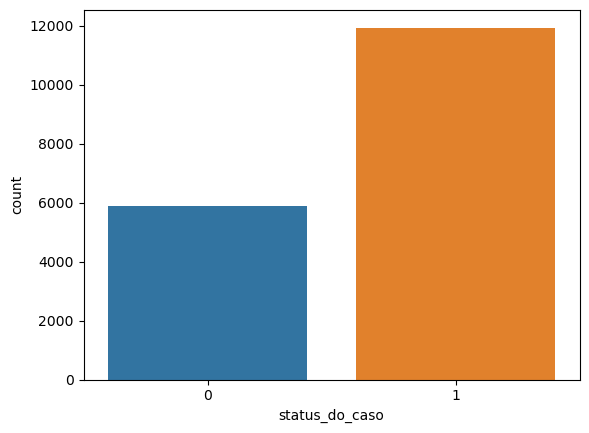

In [10]:
sns.countplot(df['status_do_caso'])

In [12]:
numeric_features, categorical_features = cls_feature(X)

## Enconding obj datatypes

In [16]:
for col in categorical_features :
    print(f'{col}: {df[col].unique()}')

continente: ['Europa' 'Ásia' 'América do Sul' 'América do Norte' 'África' 'Oceania']
educacao_do_empregado: ['Ensino Médio' 'Mestrado' 'Ensino Superior' 'Doutorado']
tem_experiencia_de_trabalho: ['N' 'S']
requer_treinamento_de_trabalho: ['S' 'N']
regiao_de_emprego: ['Sul' 'Meio-Oeste' 'Ilha' 'Nordeste' 'Oeste']
unidade_de_salario: ['Ano' 'Semana' 'Hora' 'Mês']
cat_empresa: ['antiga' 'nova' 'intermediaria']
cat_salario: ['medio_baixo' 'alto' 'medio_alto' 'baixo']


In [21]:
for col in categorical_features:
    label_enconder = LabelEncoder()
    
    label_enconder.fit(df[col].unique())
    
    df[col] = label_enconder.transform(df[col])
    
    print(f'{col} :{df[col].unique()}')
    
    

continente :[2 5 1 0 4 3]
educacao_do_empregado :[1 3 2 0]
tem_experiencia_de_trabalho :[0 1]
requer_treinamento_de_trabalho :[1 0]
regiao_de_emprego :[4 1 0 2 3]
unidade_de_salario :[0 3 1 2]
cat_empresa :[0 2 1]
cat_salario :[3 0 2 1]


In [23]:
df

,continente,educacao_do_empregado,tem_experiencia_de_trabalho,requer_treinamento_de_trabalho,num_de_empregados,ano_de_estabelecimento,regiao_de_emprego,salario_prevalecente,unidade_de_salario,posicao_em_tempo_integral,status_do_caso,cat_empresa,cat_salario,cat_experiencia
0,2,1,0,1,2087,1855,4,69711.24,0,1,0,0,3,3
1,5,3,1,0,5991,2003,1,52931.38,0,1,1,2,3,2
2,5,1,0,0,1426,2000,0,110830.21,0,1,0,2,0,4
3,5,1,0,0,3846,1992,1,91884.68,3,1,0,1,2,4
4,5,2,1,0,3957,1949,2,138155.24,0,1,1,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17831,5,3,1,0,95347,1995,3,69692.24,0,1,1,1,3,2
17832,2,1,0,0,1483,1886,4,136237.62,0,1,0,0,0,4
17833,0,3,0,0,1504,2010,2,118187.30,0,1,0,2,0,4
17834,0,0,1,0,251967,2010,1,93133.40,0,1,1,2,2,2


## Modelo

### Random Forest

In [24]:
# Separar os dados em features (X) e target (y)
X = df.drop(columns='status_do_caso')  # Substitua 'target_column' pelo nome da coluna alvo
y = df['status_do_caso']

In [26]:
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.3,random_state=42)

In [31]:
rfc = RandomForestClassifier(class_weight='balanced')
param_grid = {
    
    'n_estimators': [100,200],
    'max_depth': [None, 5, 10],
    'max_features': ['sqrt','log2',None],
    'random_state': [0,42]
}

#busca de melhores parametros
grid_search = GridSearchCV(rfc,param_grid,cv=5)
grid_search.fit(X_train,y_train)

#print melhores paramentros
print(grid_search.best_params_)


{'max_depth': 10, 'max_features': None, 'n_estimators': 100, 'random_state': 0}


In [32]:
rf_model = RandomForestClassifier(n_estimators=100,max_depth=10,random_state=0)
rf_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, random_state=0)

In [33]:
y_pred = rf_model.predict(X_valid)

# Calcular o AUC-ROC
auc_roc = roc_auc_score(y_valid, y_pred)
auc_roc


0.6398556788215373

In [34]:
round(accuracy_score(y_valid,y_pred)*100,2)

73.24

In [35]:
from sklearn.metrics import classification_report
# Obter relatório de classificação
classification_report = classification_report(y_valid, y_pred)

print("Relatório de Classificação:")
print(classification_report)

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.65      0.38      0.48      1739
           1       0.75      0.90      0.82      3612

    accuracy                           0.73      5351
   macro avg       0.70      0.64      0.65      5351
weighted avg       0.72      0.73      0.71      5351



### Logist Regression

In [83]:
log_grid = LogisticRegression(class_weight='balanced')

param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.1, 1.0, 10.0],
    'solver': ['lbfgs', 'liblinear', 'saga'],
    'max_iter': [100, 500, 1000]
}

#busca de melhores parametros
grid_search = GridSearchCV(log_grid,param_grid,cv=5)
grid_search.fit(X_train,y_train)

#print melhores paramentros
print(grid_search.best_params_)



The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the

{'C': 1.0, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}



180 fits failed out of a total of 405.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/anaconda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

----------------------------

### Metricas

In [38]:
print('F-1 Score: ',(f1_score(y_valid,y_pred,average='micro')))
print('Precision Score: ', (precision_score(y_valid,y_pred,average='micro')))
print('Recall Score: ', (recall_score(y_valid,y_pred,average='micro')))
print('Jaccard Score: ', (jaccard_score(y_valid,y_pred,average='micro')))
print('Log Loss: ', (log_loss(y_valid,y_pred)))

F-1 Score:  0.7323864698187255
Precision Score:  0.7323864698187255
Recall Score:  0.7323864698187255
Jaccard Score:  0.5777679492849771
Log Loss:  9.24320615965638


## feature importance

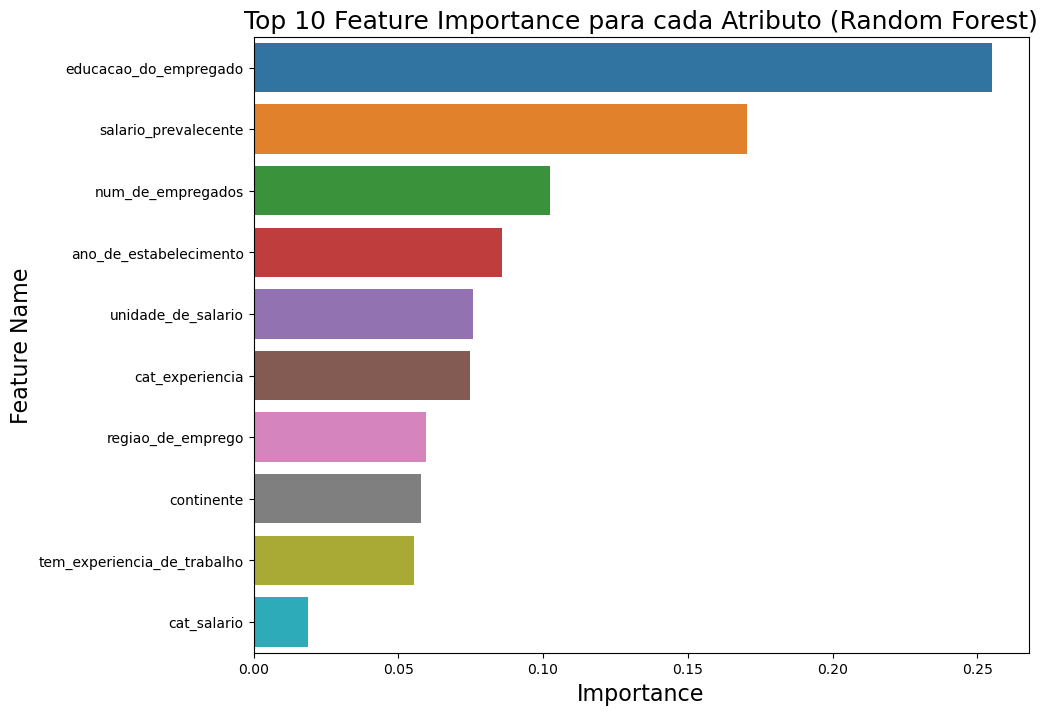

In [40]:
imp_df = pd.DataFrame({
    'Feature Name': X_train.columns,
    'Importance': rf_model.feature_importances_
})
fi = imp_df.sort_values(by ='Importance',ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data = fi2, x = 'Importance',y = 'Feature Name')
plt.title('Top 10 Feature Importance para cada Atributo (Random Forest)',fontsize = 18)
plt.xlabel('Importance',fontsize = 16)
plt.ylabel('Feature Name',fontsize = 16)
plt.show()

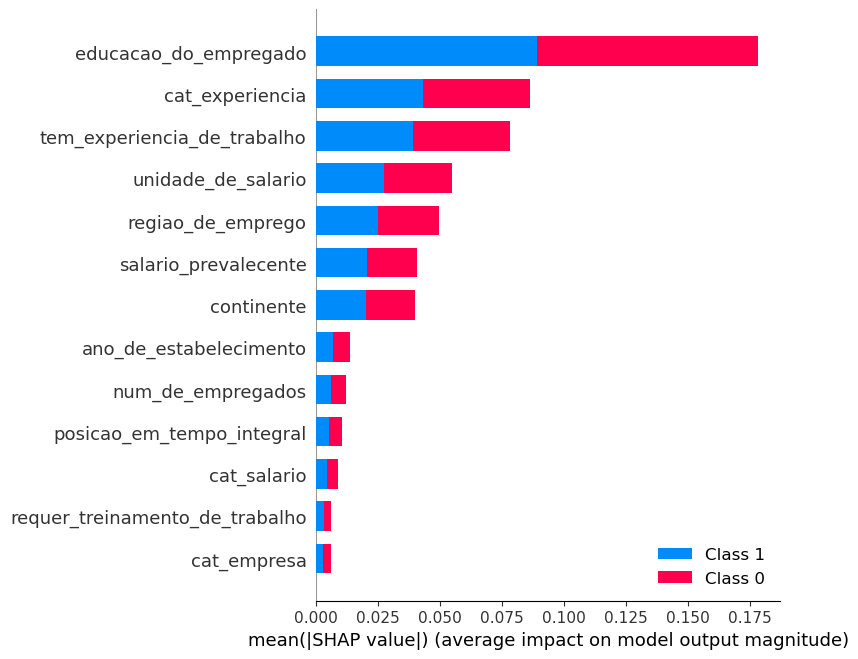

In [46]:
import shap
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_valid)
shap.summary_plot(shap_values,X_valid)

Text(0.5, 1.0, 'Accuracy Score Random Forest 0.7323864698187255')

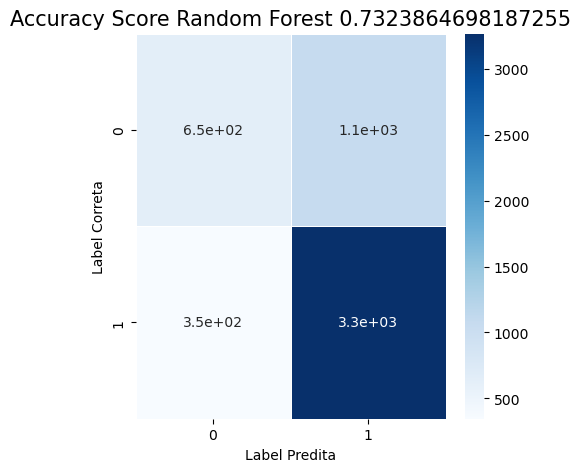

In [51]:
cm = confusion_matrix(y_valid,y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data = cm , linewidths=.5  , annot=True , cmap = 'Blues')
plt.ylabel('Label Correta')
plt.xlabel('Label Predita')
plt.title('Accuracy Score Random Forest {0}'.format(rf_model.score(X_valid,y_valid)), size = 15)